In [1]:
import os
import pandas as pd

In [3]:
path2data = "./data/DF-Annotation-Training400"
path2labels = os.path.join(path2data, "Training400", "Fovea_location.xlsx")
labels_df = pd.read_excel(path2labels, index_col="ID")
labels_df.head()

,imgName,Fovea_X,Fovea_Y
ID,,,
1,A0001.jpg,1182.264278,1022.018842
2,A0002.jpg,967.754046,1016.946655
3,A0003.jpg,1220.206714,989.944033
4,A0004.jpg,1141.140888,1000.594955
5,A0005.jpg,1127.371832,1071.109440


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

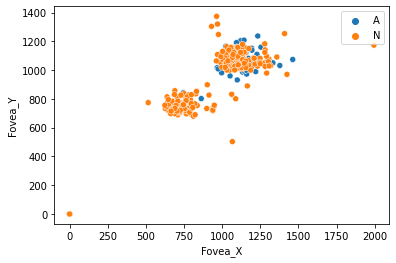

In [8]:
AorN = [img_name[0] for img_name in labels_df["imgName"]]
_ = sns.scatterplot(x="Fovea_X", y="Fovea_Y", data=labels_df, hue=AorN)
plt.show()

In [10]:
# lets plot some images with the location of the fovea
import numpy as np
from PIL import Image, ImageDraw

# fix a seed
np.random.seed(2019)

# plot params
plt.rcParams["figure.figsize"] = (15, 9)
plt.subplots_adjust(wspace=0, hspace=0.3)
nrows, ncols = 2, 3

<Figure size 1080x648 with 0 Axes>

In [11]:
img_name = labels_df["imgName"]
ids = labels_df.index
rnd_ids = np.random.choice(ids, nrows*ncols)
print(rnd_ids)

[ 73 371 160 294 217 191]


In [12]:
def load_img_label(labels_df, id_):
    img_name = labels_df["imgName"]
    if img_name[id_][0] == "A":
        prefix = "AMD"
    else:
        prefix = "Non-AMD"

    fullpath2img = os.path.join(path2data, "Training400", prefix, img_name[id_])
    img = Image.open(fullpath2img)
    x = labels_df["Fovea_X"][id_]
    y = labels_df["Fovea_Y"][id_]
    label = (x, y)
    return img, label

In [13]:
# to show the image and label as bounding box
def show_img_label(img, label, w_h=(50, 50), thickness=2):
    w, h = w_h
    cx, cy = label
    draw = ImageDraw.Draw(img)
    draw.rectangle(((cx - w / 2, cy - h / 2), (cx + w / 2, cy + h / 2)), outline="green", width=thickness)
    plt.imshow(np.asarray(img), cmap="gray")

(2124, 2056) (1037.89889229694, 1115.71768088143)
(1444, 1444) (635.148992978281, 744.648850248249)
(1444, 1444) (639.360312038611, 814.762764100936)
(2124, 2056) (1122.08407442503, 1067.58829793991)
(2124, 2056) (1092.93333646222, 1055.15333296773)
(2124, 2056) (1112.50135915347, 1070.7251775623)


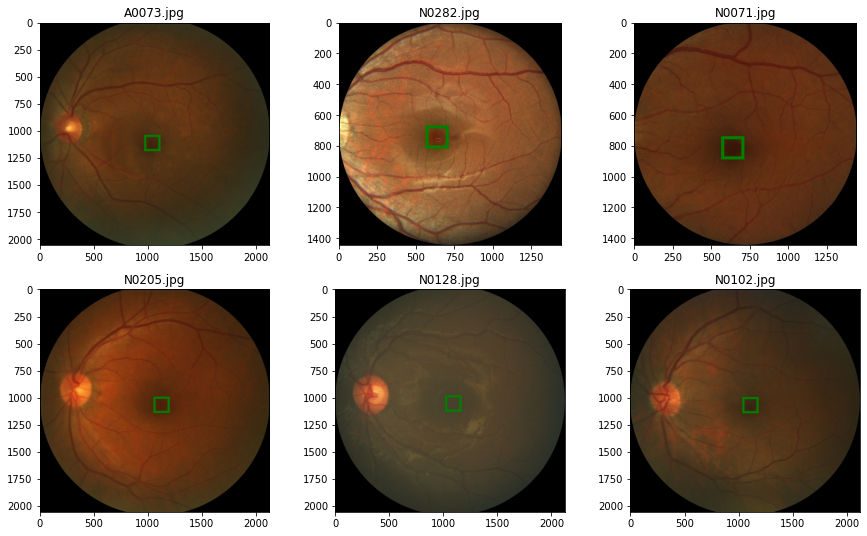

In [15]:
# lets show those images with the boxes
for i, id_ in enumerate(rnd_ids):
    # get the specific image
    img, label = load_img_label(labels_df, id_)
    print(img.size, label)
    plt.subplot(nrows, ncols, i+1)
    # draw the box for that image
    show_img_label(img, label, w_h=(150, 150), thickness=20)
    plt.title(img_name[id_])

Some images have different sizes, let look at how those images are distributed

In [16]:
h_list, w_list = [], []
for id_ in ids:
    if img_name[id_][0]=="A":
        prefix = "AMD"
    else:
        prefix = "Non-AMD"
    fullpath2img = os.path.join(path2data, "Training400", prefix, img_name[id_])
    img = Image.open(fullpath2img)
    h, w = img.size
    h_list.append(h)
    w_list.append(w)

/home/luba/.local/share/virtualenvs/dl-deep-dive-_doing_-JjS9YL3a/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


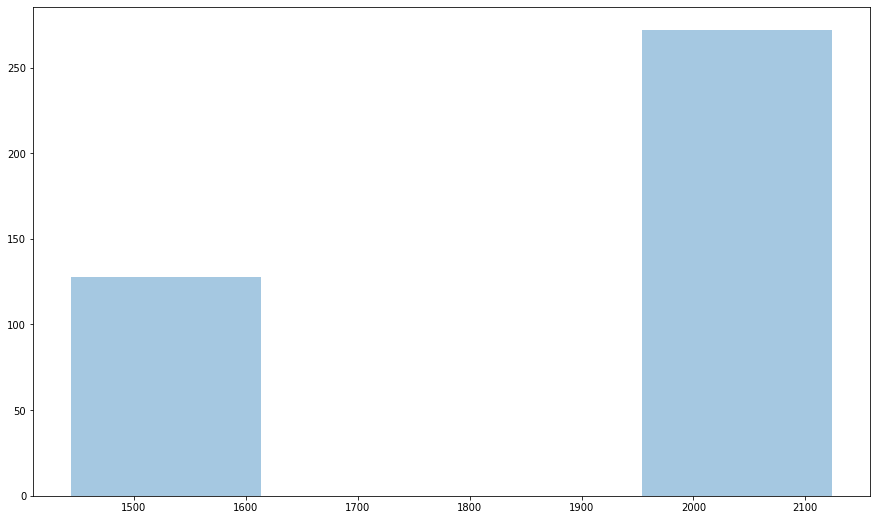

In [20]:
_ = sns.distplot(a=h_list, kde=False)
plt.show()

/home/luba/.local/share/virtualenvs/dl-deep-dive-_doing_-JjS9YL3a/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


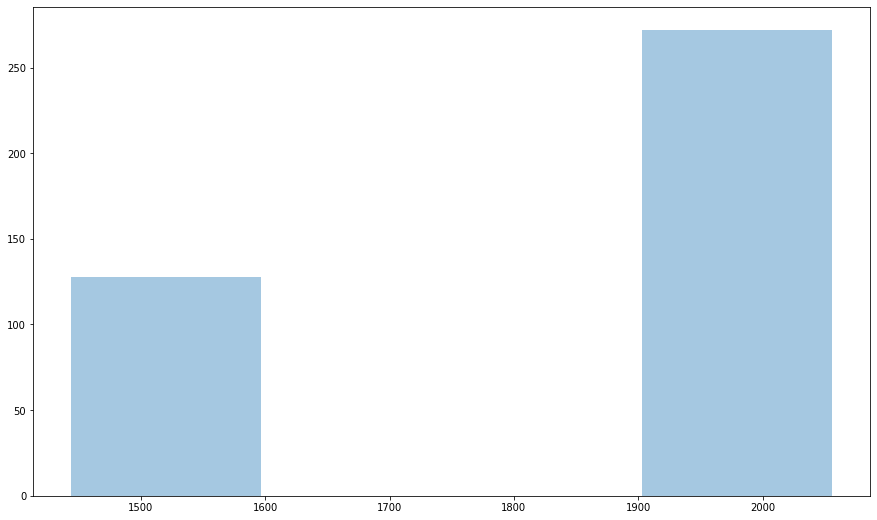

In [22]:
_ = sns.distplot(a=w_list, kde=False)
plt.show()